# Procedural versus Object-Oriented Plotting in Matplotlib
---
## Questions
- What is the difference between `plt.plot()` and `ax.plot()`?
- Why are there two different ways of generating plots with Matplotlib?
- Why do these various plot commands I copied from a Stack Overflow post not work?

## Learning Objectives
- Understand the difference between procedural and object-oriented programming
- Understand and recognize procedural vs. object-oriented uses of Matplotlib
- Appropriately choose between and use these approaches


---
## Introduction
One of the most confusing things about learning Matplotlib is that it supports two fundamentally different ways of approaching plotting. These have been mentioned earlier, in the context of comparing programming languages: *procedural* and *object-oriented*. We'll explain these differences below. Python is an object-oriented language, however Matlab is a functional language. Thus in pursuing its initial goal of emulating Matlab's plotting functions, Matplotlib implemented a functional approach to generating plots. Subsequently however, an object-oriented approach was implemented as well. This means that when you encounter examples using Matplotlib "in the wild" — be that other people's code, tutorials, blog posts, etc. — you may see two rather different ways of doing the same thing, often with what may appear to be only subtle differences in the code. However, the two approaches are fundamentally different, and thus attempts to use snippets of code that you see in some examples may create errors, if you attempt to combine Matplotlib's functional and object-oriented approaches to generate a single figure. 

Procedural programming is based around variables, data structures, and procedures — ways of operating on variables and data structures. In contrast, object-oriented programming is based around **objects**, which can have both data and methods in them. For example, pandas DataFrames are objects — they contain data, but they also have a set of methods that can operate on the data (e.g., `df.plot()`, `df.merge()`). 

We will cover both approaches here, but will focus more on object-oriented approach, since this is consistent with the rest of Python, and is the approach recommended by most people, including [Matplotlib's official documentation](https://matplotlib.org/tutorials/introductory/lifecycle.html#a-note-on-the-object-oriented-api-vs-pyplot). That said, either way is acceptable; the most important thing is understanding the differences so as to avoid mixing the two and getting errors. 

## Procedural Approach

The procedural approach uses the Matplotlib module PyPlot (`matplotlib.pyplot`). Modules in Python packages are a way of organizing functions, into related or conceptual groupings. You can think of modules as subdirectories within the package's main folder. This means that `matplotlib.pyplot` contains a variety of functions, which have names like `matplotlib.pyplot.plot()`. Because that's a lot to type, the convention is to import the PyPlot module as the alias `plt`, as follows:

~~~python
import matplotlib.pyplot as plt
~~~

In [2]:
import matplotlib.pyplot as plt

Then we can use this alias followed by the name of PyPlot functions to generate plots:

~~~python
# Make data to plot
x = range(0, 10)
y = range(0, 10)

# Draw the plot
plt.plot(x, y)
~~~

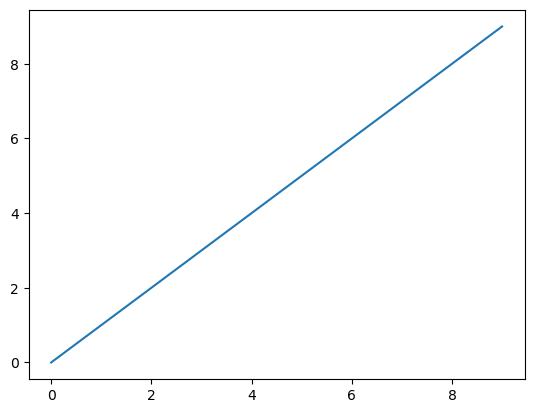

In [3]:
x = range(0,10)
y = range(0,10)

plt.plot(x,y)

You may notice that above the plot is some text, something like, `[<matplotlib.lines.Line2D at 0x7ff8b002e710>]`. This is part of the output of the `plt.plot()` command, but typically not something that we care to see. We can generate the plot without this extra output, by including the command `plt.show()` at the end of the cell. Recall that Jupyter only shows the output of the last output-generating command in a cell, and `plt.show()` shows the plot without the extra text. It's good practice to get into the habit of adding `plt.show()` when using Matplotlib.

~~~python
# Draw the plot
plt.plot(x, y)

# Show the plot
plt.show()
~~~

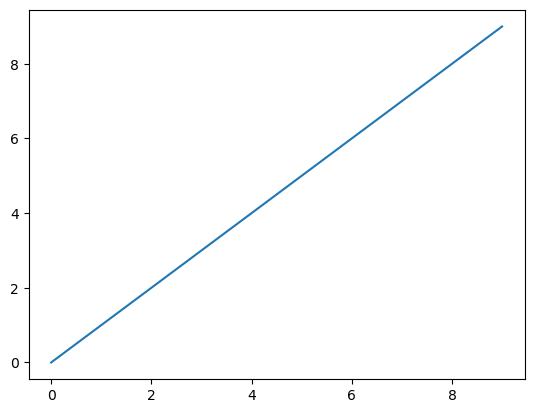

In [4]:
plt.plot(x,y)
plt.show()

We can use additional PyPlot functions to modify the plot, such as adding a title:

~~~python
plt.plot(x, y)
plt.title('A perfect correlation')
plt.show()
~~~

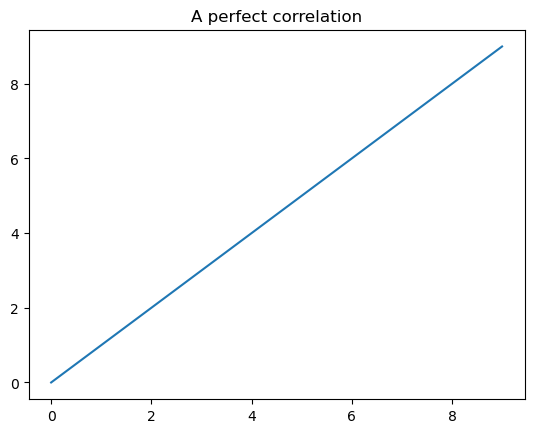

In [6]:
plt.plot(x,y)
plt.title('A perfect correlation')
plt.show()

## Object-Oriented Approach
In contrast, the object-oriented approach involves starting by creating an instance of a Matplotlib `Figure` object and assigning it to a variable name (by convention, `fig`). Matplotlib allows a figure to contain more than one subplot; the set of subplots in a figure are called **axes** (each of the axes has an *x*-axis and a *y*-axis). Thus in creating a `Figure` object we need to assign it to a variable for the figure, and a list of the axes objects in the figure. Then we use methods on the individual axes to plot and modify the contents of each subplot. 

Thus to create a figure using the object-oriented approach, we can use the `plot.subplots()` command and assign its outputs to `fig` and `ax`: 

    fig, ax = plt.subplots()

It may seem confusing to use a command called `plt.subplots()` if we only want a single plot, but it is good practice to use this by default, so that you don't have to remember different commands for creating figures with one versus many subplots.


By default, our figure will have a single axes object. So we can use, for example, the `.plot()` method on the axes object to plot the data

~~~python
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('A perfect correlation')
plt.show()
~~~

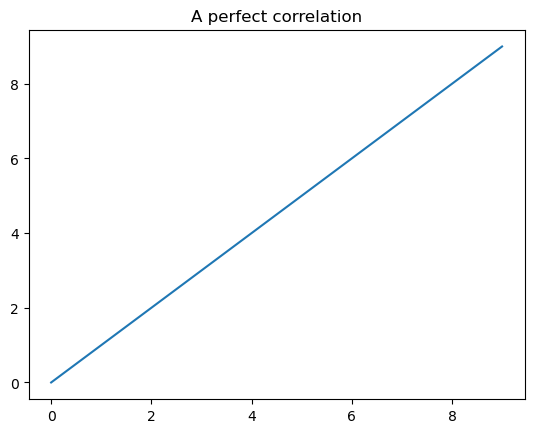

In [7]:
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_title('A perfect correlation')
plt.show()

## What's the Difference?

Although `plt.plot()` and `ax.plot()` look like similar commands, it's important to understand that they are actually very different: `plt.plot()` is a *function* that is part of the `plt` (`matplotlib.pyplot`) family of functions, whereas in `ax.plot()`, `ax` is a Matplotlib `Axes` *object* that we created, and `.plot()` is a *method* available to all `Figure` objects. This may become clearer if we note that rather than `fig`, we could assign the `Figure` object to any variable name we like, such as

~~~python
my_long_figure_name, my_long_axes_name = plt.subplots()
my_long_axes_name.plot(x, y)
my_long_axes_name.set_title('This is a figure')
plt.show()
~~~

## Functions vs. Properties

The difference between procedural and object-oriented approaches also explains why certain commands are different, such as `plt.title()` versus `ax.set_title()`. In the object-oriented approach, we are setting the `title` *property* of the `ax` object, rather than just specifying the title of the plot. Indeed, having run `ax.set_title()` above, we can ask for the `title` property of the object with `ax.title` (note the lack of parentheses `()` after `.title` — recall that parentheses are used for object *methods*, but not object *properties*):

~~~python
ax.title
~~~

Whereas doing the same thing with `plt.title` tells us that this is a function, and what arguments it takes, rather than returning properties like the title we set with `plt.title()` above.

~~~python
plt.title
~~~

---
## Summary of Key Points
- Matplotlib allows either procedural or object-oriented approaches to plotting
- It's important to be aware of this, and be able to identify which one is being used, especially when trying to use online examples in your own code
- The procedural approach typically starts with a `plt.plot()` command
    - The plot is then modified by additional *functions* that start with `plt.` (such as `plt.title()` to set a title)
- The object-oriented approach starts by defining a plot object, with `plt.subplots()`, and assigning the result of this to `fig` and `ax` variables (i.e., `fig, ax = plt.subplots()`)
    - The plot is then modified using *methods* that apply to axes objects, such as `ax.set_title()`
- Procedural and object-oriented approaches are incompatible with each other, so trying to combine bits of code that use the different approaches (as may happen if you have a bit of code and are using online help to improve it) usually results in errors and frustration
- Both procedural and object-oriented approaches are valid ways to use Matplotlib. In general, the object-oriented approaches are more pythonic, and they also are generally better when you want to generate a figure with different subplots